Neste notebook testamos como o modelo completo sexuado se comporta com apenas um morfo para diferentes valores de $\sigma_A$.

In [1]:
#Importando bibliotecas
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint, quad, dblquad
from scipy.integrate import trapezoid as trapz
from scipy.interpolate import CubicSpline
import warnings

In [2]:
#Definindo funções
def normal(z, zbar, V):
    return 1 / np.sqrt(2*np.pi*V) * np.exp(-(z-zbar)**2/(2*V))

def densidade(z, x, qtdz):
    soma = 0
    for j in range(qtdz):
        soma += x[1+j] * normal(z, x[1+2*qtdz+j], x[1+qtdz+j])
    return x[0] * soma

In [3]:
#Modelo completo sexuado
def cria_modelo_completo(b0, s, d0, w, sigmaA, sigmaf, xmax, num):
    z = np.linspace(-xmax, xmax, num)
    dx = 2*xmax/(num-1)
    if dx > sigmaA:
        raise(ValueError(f"dx = {dx}, sigmaA = {sigmaA}, mas dx deve ser *menor* que sigmaA"))
    
    def b(x):
        return b0 - s*x**2
    def c(x):
        return np.exp(-x**2/(2*w**2))
    def d(x, z, n):
        return d0 + trapz(c(z - x) * n, z)
    @np.vectorize
    def A(u, v):
        return 1/(2*np.pi*sigmaA**2)*np.exp(-(u-v)**2/sigmaA**2)
    
    def Nfilho(x, u, v):
        return 1/(np.sqrt(2*np.pi)*sigmaf)*np.exp(-1/2*((x-(u+v)/2)/sigmaf)**2)
    
    def integral_dentro(x, u, fn):
        return ((1/(2 * np.pi * sigmaA**2 * np.sqrt(2*np.pi) * sigmaf)) * 
                2 * np.sqrt(np.pi * (2*sigmaf**2)) * 
                fn(2*x-u) * np.exp(-4*(u-x)**2/sigmaA**2))
    integral_dentro = np.vectorize(integral_dentro, excluded=set([1, 2, "u", "fn"]))
    
    def beta(x, n, Nu, fn):
        return trapz(n / Nu * integral_dentro(x, z, fn), z)
    beta = np.vectorize(beta, excluded=set([1, 2, 3, "n", "Nu", "fn"]))
    
    Auv = []
    for uu in z:
        Auv.append(A(uu, z))
    Auv = np.array(Auv)
    
    def eq(n, t):
        fn = CubicSpline(z, n)
        Nu = np.apply_along_axis(trapz, 0, Auv * n, z)
        
        dn = np.zeros(num)
        for i in range(num):
            dn[i] = beta(z[i], n, Nu, fn) * b(z[i]) - d(z[i], z, n)*n[i]
        return dn
    
    return eq

In [18]:
## parâmetros

xmax = 3
num = 1201
z = np.linspace(-xmax, xmax, num)
dx = 2*xmax/(num-1)
b0 = 1
s = 0.1
w = 2
d0 = 0.001
sigmaA = 1
sigmaf = 1e-3

#Tempo
temp = 50
t = np.arange(0, temp, 5)

#Condições iniciais
x0 = np.array([1., 2/3, 0.01, 0.1])
n0 = densidade(z, x0, 1)

In [19]:
#Criando modelo com os valores dos parâmetros especificados
eq_comp = cria_modelo_completo(b0, s, d0, w, sigmaA, sigmaf, xmax, num)

In [20]:
#Rodando o modelo
%%time
y_comp = odeint(eq_comp, n0, t)

CPU times: total: 3min 26s
Wall time: 3min 30s


(-1.5, 1.5)

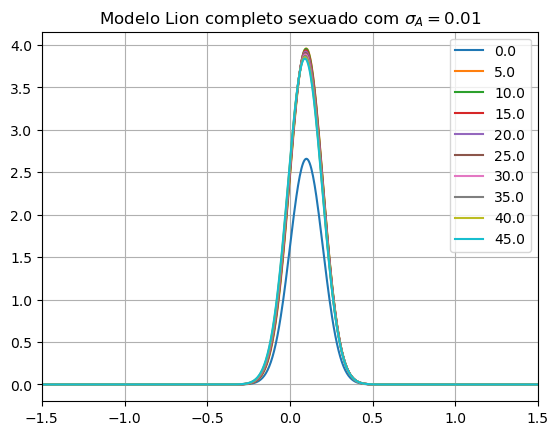

In [8]:
#Plotando o modelo para alguns pontos no tempo
for i in range(len(t)):
    plt.plot(z, y_comp[i], label=f"{t[i]:.1f}")
plt.title(r"Modelo Lion completo sexuado com $\sigma_A=$"+str(sigmaA))
plt.legend()
plt.grid()
plt.xlim(-1.5, 1.5)

(-1.5, 1.5)

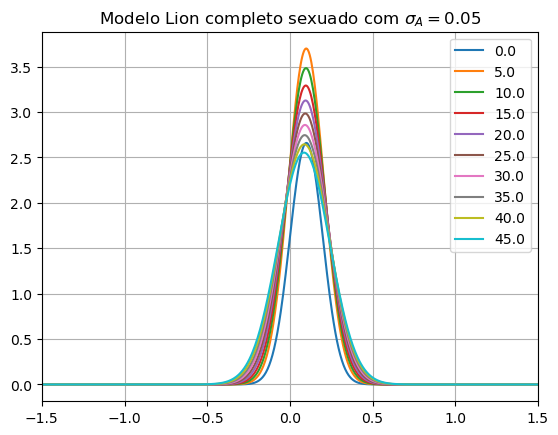

In [13]:
#Plotando o modelo para alguns pontos no tempo
for i in range(len(t)):
    plt.plot(z, y_comp[i], label=f"{t[i]:.1f}")
plt.title(r"Modelo Lion completo sexuado com $\sigma_A=$"+str(sigmaA))
plt.legend()
plt.grid()
plt.xlim(-1.5, 1.5)

(-1.5, 1.5)

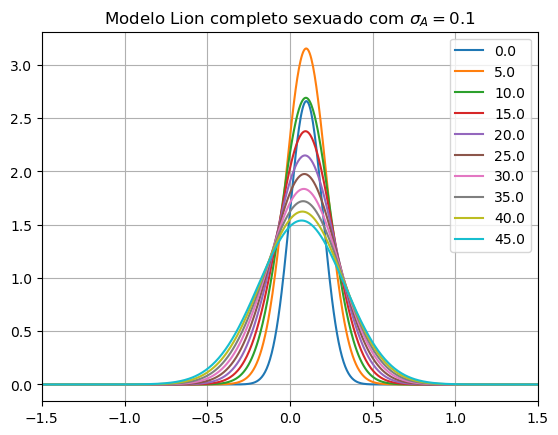

In [17]:
#Plotando o modelo para alguns pontos no tempo
for i in range(len(t)):
    plt.plot(z, y_comp[i], label=f"{t[i]:.1f}")
plt.title(r"Modelo Lion completo sexuado com $\sigma_A=$"+str(sigmaA))
plt.legend()
plt.grid()
plt.xlim(-1.5, 1.5)

(-1.5, 1.5)

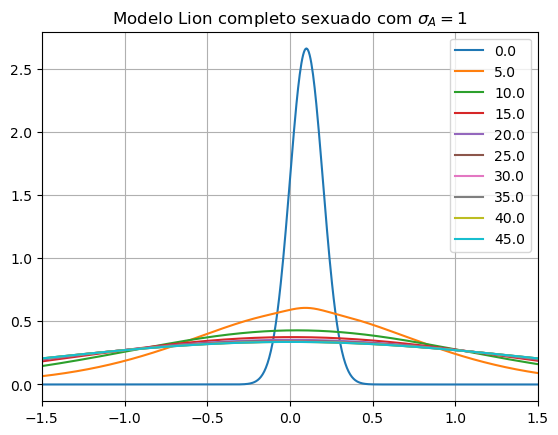

In [21]:
#Plotando o modelo para alguns pontos no tempo
for i in range(len(t)):
    plt.plot(z, y_comp[i], label=f"{t[i]:.1f}")
plt.title(r"Modelo Lion completo sexuado com $\sigma_A=$"+str(sigmaA))
plt.legend()
plt.grid()
plt.xlim(-1.5, 1.5)